# Trabajo, flujo de trabajo en machine learning con `scikit-learn`
Para ilustar el flujo de trabajo frente a un conjunto de datos usando scikit-learn, vamos a considerar la predicción de la nota media de los alumnos de grados de la ETSIT que ya se abordó en el trabajo anterior.

El fichero que contiene los datos es `notas_DURM_media_ETSIT.csv` que se puede descargar del Aula Virtual y guardar en la carpeta data del directorio asociado a nuestro workspace. 

Después de cargar las librerías `pandas`, `numpy` y `matplotlib`, cargar los datos en un dataframe llamado `grados`.


In [2]:
# Completar aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

DATA_DIRECTORY = path.join('..', 'data')
# --------------------


In [3]:
# Completar aquí
grados = pd.read_csv(
    path.join(DATA_DIRECTORY,  'notas_DURM_media_ETSIT.csv'),
    sep=','
)
# --------------------
grados

,PLAN_ID,CREDITOS,MEDIA,CURSO_INICIO,NOTA_PAU_FISICA,NOTA_PAU_MATEMATICAS II,NOTA_PAU_CALIFICACION,PLAN_DESC,NOTA_FUNDAMENTOS DE PROGRAMACIÓN,NOTA_ONDAS ELECTROMAGNÉTICAS,...,MATRICS_TOTALES_SISTEMAS Y CIRCUITOS,MATRICS_TOTALES_TEORÍA DE LA COMUNICACIÓN,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_FUNDAMENTOS DE PROGRAMACIÓN,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_ONDAS ELECTROMAGNÉTICAS,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_SISTEMAS Y CIRCUITOS,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_TEORÍA DE LA COMUNICACIÓN,CONVOCS_TOTALES_FUNDAMENTOS DE PROGRAMACIÓN,CONVOCS_TOTALES_ONDAS ELECTROMAGNÉTICAS,CONVOCS_TOTALES_SISTEMAS Y CIRCUITOS,CONVOCS_TOTALES_TEORÍA DE LA COMUNICACIÓN
0,5041,234.0,8.810897,2010-11,9.6,9.80,9.34,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,8.6,7.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
1,5041,222.0,7.472973,2010-11,2.3,9.25,7.43,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,5.0,5.5,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0
2,5041,228.0,8.051316,2010-11,8.7,7.25,8.10,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,6.9,5.5,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
3,5041,222.0,8.673649,2010-11,9.8,9.00,9.15,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,9.0,6.0,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0
4,5041,240.0,7.425000,2010-11,4.1,9.00,7.97,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,8.4,6.3,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,5051,120.0,8.135000,2018-19,5.1,10.00,9.57,GRADO EN INGENIERÍA TELEMÁTICA (BOE 20-04-2011),10.0,7.3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
314,5051,120.0,9.040000,2018-19,10.0,10.00,9.68,GRADO EN INGENIERÍA TELEMÁTICA (BOE 20-04-2011),10.0,9.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
315,5051,120.0,8.075000,2018-19,5.4,8.75,8.38,GRADO EN INGENIERÍA TELEMÁTICA (BOE 20-04-2011),8.5,8.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
316,5051,120.0,8.500000,2018-19,8.0,9.00,8.54,GRADO EN INGENIERÍA TELEMÁTICA (BOE 20-04-2011),9.0,8.1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Empezamos por definir la matriz `X` de características y el vector `y` de respuestas

Vamos a empezar por definir la matriz `X` de características. Queremos incluir todas las características numéricas desde `NOTA_PAU_FISICA` que tienen que ver con la PAU, así como las de notas y las convocatorias de las asignaturas de las carrera consideradas. (No vamos a incluir las matrículas)

In [4]:
# Completar aquí: Definimos primero el DataFrame X_df que contenga las columnas que nos interesen
# X_df = pd.DataFrame()
# for c in grados.columns:
#    if(('NOTA' in c) or ('CONVOCS' in c)):
#        X_df[c] = grados[c]

X_df = grados.loc[:, lambda x: x.columns.str.contains('NOTA_|CONVOCS_')]
# --------------------
print(X_df.columns)


Index(['NOTA_PAU_FISICA', 'NOTA_PAU_MATEMATICAS II', 'NOTA_PAU_CALIFICACION',
       'NOTA_FUNDAMENTOS DE PROGRAMACIÓN', 'NOTA_ONDAS ELECTROMAGNÉTICAS',
       'NOTA_SISTEMAS Y CIRCUITOS', 'NOTA_TEORÍA DE LA COMUNICACIÓN',
       'CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_FUNDAMENTOS DE PROGRAMACIÓN',
       'CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_ONDAS ELECTROMAGNÉTICAS',
       'CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_SISTEMAS Y CIRCUITOS',
       'CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_TEORÍA DE LA COMUNICACIÓN',
       'CONVOCS_TOTALES_FUNDAMENTOS DE PROGRAMACIÓN',
       'CONVOCS_TOTALES_ONDAS ELECTROMAGNÉTICAS',
       'CONVOCS_TOTALES_SISTEMAS Y CIRCUITOS',
       'CONVOCS_TOTALES_TEORÍA DE LA COMUNICACIÓN'],
      dtype='object')


Podemos transformar `X_df` a `X`, que será un `ndarray` de `numpy` usando su atributo `values`

In [5]:
# Completar aquí
X = X_df.values
# --------------------
print(f'X es un objeto de tipo {type(X)} con tamaño {X.shape}')

X es un objeto de tipo <class 'numpy.ndarray'> con tamaño (318, 15)


Definimos ahora el vector `y` de respuestas

In [6]:
# Completar aquí
y = np.array(grados['MEDIA'])
# --------------------
print(y[:10])

[8.81089744 7.47297297 8.05131579 8.67364865 7.425      8.04539474
 6.53690476 9.07039474 6.87152778 9.08881579]


In [7]:
import sklearn
from sklearn.impute import SimpleImputer

# Primer bloque en la cadena de manipulación: imputación de valores faltantes
Empezad por obtener el número de valores faltantes de cada columna, desglosando por grado.

In [8]:
# Completar aquí
# grados_nan = pd.DataFrame(columns=grados.columns, index=grados.PLAN_ID.unique())
# i = 0
# for pid in grados.PLAN_ID.unique():
#    g_aux = grados[grados['PLAN_ID'] == pid]    
#    grados_nan.iloc[i] = g_aux.isna().sum(min_count = 1)
#    i = i + 1

grados.groupby('PLAN_ID').apply(lambda x: x.isna().sum())
# --------------------
#grados_nan

,PLAN_ID,CREDITOS,MEDIA,CURSO_INICIO,NOTA_PAU_FISICA,NOTA_PAU_MATEMATICAS II,NOTA_PAU_CALIFICACION,PLAN_DESC,NOTA_FUNDAMENTOS DE PROGRAMACIÓN,NOTA_ONDAS ELECTROMAGNÉTICAS,...,MATRICS_TOTALES_SISTEMAS Y CIRCUITOS,MATRICS_TOTALES_TEORÍA DE LA COMUNICACIÓN,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_FUNDAMENTOS DE PROGRAMACIÓN,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_ONDAS ELECTROMAGNÉTICAS,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_SISTEMAS Y CIRCUITOS,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_TEORÍA DE LA COMUNICACIÓN,CONVOCS_TOTALES_FUNDAMENTOS DE PROGRAMACIÓN,CONVOCS_TOTALES_ONDAS ELECTROMAGNÉTICAS,CONVOCS_TOTALES_SISTEMAS Y CIRCUITOS,CONVOCS_TOTALES_TEORÍA DE LA COMUNICACIÓN
PLAN_ID,,,,,,,,,,,,,,,,,,,,,
5041,0,0,0,0,21,5,2,0,9,5,...,3,3,9,5,3,3,9,5,3,3
5051,0,0,0,0,22,12,3,0,32,23,...,31,24,32,23,31,24,32,23,31,24


Podemos decidir imputar a los valores faltantes el valor de la mediana de su columna. Para ello, podemos usar la clase `SimpleImputer` del submódulo `impute` de `sklearn`. `SimpleImputer` es un objeto de la clase `Transformer`. para más información, ver la [referencia](https://scikit-learn.org/stable/modules/impute.html#impute)

Para ello, vamos a seguir los pasos vistos en las transparencias:
1. Instanciamos el objeto que llamaremos `imp`, especificando el parámetro `strategy='median'` indicando así que queremos que sustituya los valores faltantes (codificados como `np.nan`) por la mediana de su columna:

In [9]:
# Completar aquí: 
imp = SimpleImputer(missing_values=np.nan, strategy='median')
# --------------------
imp


SimpleImputer(strategy='median')

2. Ahora podemos realizar la estimación de los parámetros necesarios para el transformador, en el caso de nuestro conjunto de datos. Se realiza con el método `fit`.

In [10]:
# Completar aquí
imp.fit(X)
# --------------------
# Comprobamos los valores que ha calculado para poder posteriormente hacer la sustitución de los valores faltantes 
imp.statistics_

array([6.28, 6.53, 7.54, 7.5 , 5.95, 5.9 , 6.4 , 1.  , 2.  , 1.  , 1.  ,
       1.  , 3.  , 1.  , 2.  ])

Entendéis cómo se ha calculado el valor 6.28 por ejemplo? Explicad lo aquí: Es la mediana de cada columna de X, se puede comprobar a través de X_df.median()




3. Podemos ahora aplicar el transformador con sus parámetros ya preparados a la matrix `X` y asignar el resultado a una nueva matriz `X_completada`. Se realiza con el método `transform`.

In [11]:
# Completar aquí
X_completada = imp.transform(X)
# --------------------
pd.DataFrame(X_completada).count()

0     318
1     318
2     318
3     318
4     318
5     318
6     318
7     318
8     318
9     318
10    318
11    318
12    318
13    318
14    318
dtype: int64

## Creación del flujo con un `pipe`
Vamos ahora a unir tres etapas del procesamiento de los datos:
- imputación de valores faltantes
- estanderización: aunque las columnas no sean de ordenes de magnitud muy diferentes, para ilustrar el procedimiento, vamos a usar del submodulo `preprocessing` el transformador `StandardScaler`
- estimación por regresión lineal. Para ello, vamos el usar el estimador `LinearRegression` del submódulo `linear_model` de `sklearn`

Además los combinaremos en un único flujo usando `Pipeline` del submódulo `pipeline`. Lo hacemos creando el objeto que llamaremos `procesado_regresion`. Llamaremos los steps 'imputacion', 'estanderizacion', 'regresion'.

In [12]:
# Completar aquí
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

procesado_regresion =  Pipeline([('imputacion', SimpleImputer(strategy='median')), ('estanderización', StandardScaler()), ('regresion', LinearRegression())])

# --------------------
procesado_regresion

Pipeline(steps=[('imputacion', SimpleImputer(strategy='median')),
                ('estanderización', StandardScaler()),
                ('regresion', LinearRegression())])

## Separación del conjunto de aprendizaje y el de test
Usando `train_test_split` del submódulo `model_selection`, vamos a separar un conjunto de aprendizaje, que llamaremos `X_train` e `y_train` y el conjunto de test `X_test` e `y_test`. 
Lo realizamos reservando el 20% de los casos para `test` y, para que podáis comparar vuestros resultados con los míos, usando el parámetro `random_state=314`. 

In [13]:
# Completar aquí'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

# --------------------
print(f'Tamaño de X_train: {X_train.shape}, tamaño de y_train {y_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}, tamaño de y_test {y_test.shape}')

Tamaño de X_train: (254, 15), tamaño de y_train (254,)
Tamaño de X_test: (64, 15), tamaño de y_test (64,)


## Ajuste del modelo sobre el conjunto de aprendizaje y comprobación sobre conjunto de test
Vamos ahora a aplicar la combinación de transformadores y estimador que definimos como flujo con las tres etapas ('imputacion', 'estanderizacion', 'regresion') sobre los datos de aprendizajes. El objeto `flujo` se aplica con los mismos pasos de instanciación, ajuste. 
Lo asignamos a un objeto que llamamos reg_multiple

In [14]:
reg_multiple = procesado_regresion.fit(X_train, y_train)
# Fin Completar aquí
reg_multiple

Pipeline(steps=[('imputacion', SimpleImputer(strategy='median')),
                ('estanderización', StandardScaler()),
                ('regresion', LinearRegression())])

Ahora vamos a realizar la predicción sobre el conjunto de test, creando el vector `y_test_pred`.

In [15]:
# Completar aquí
y_test_pred = reg_multiple.predict(X_test)
# --------------------
y_test_pred[:10]

array([6.77031107, 8.18766229, 7.61139718, 7.05030893, 7.07489737,
       6.7973194 , 7.0785764 , 6.27664063, 7.75293029, 7.08045576])

Nos queda evaluar la calidad de la predicción sobre el conjunto de test, calculando el RMSE. Lo guardamos en un objeto que llamamos `RMSE`.

In [16]:
# Completar aquí
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test_pred, y_test)
# --------------------
print(f'El valor del RMSE sobre el conjunto test es {RMSE}')

El valor del RMSE sobre el conjunto test es 0.25060851701117326


## Probamos con un subconjunto de características
Queremos probar con sólo las notas, tanto de la parte de acceso a la universidad como en la UPCT. Creamos una matriz `X_train_notas` que contenga sólo las columnas de `X_train` correspondientes a las características de notas (son las 7 primeras).

In [17]:
# Completar aquí
X_train_notas = X_train[:, :7]
X_test_notas = X_test[:, :7]

# --------------------
# imprimimos las tres primeras filas:
print(X_train_notas[:3,])

[[1.2   nan 7.92 5.4   nan 6.2  5.  ]
 [5.05 6.87 7.57 8.1  5.5  5.   5.3 ]
 [6.3  7.5  7.31 8.    nan 5.9   nan]]


Repetid el análisis usando `X_notas`

In [18]:
# Completar aquí
reg_multiple = procesado_regresion.fit(X_train_notas, y_train)
y_test_pred = reg_multiple.predict(X_test_notas)
RMSE = mean_squared_error(y_test_pred, y_test)

# --------------------
print(f'El valor del RMSE sobre el conjunto test es {RMSE}')
# Fin Completar aquí

El valor del RMSE sobre el conjunto test es 0.2560463065634308


# Ajuste con RandomForestRegressor
`scikit-learn` implementa otros muchos algoritmos para la predicción. En este apartado vamos a probar una regresión "Random Forest" que está basada en muchos árboles de decisión cuya predicción promedio es el resultado de nuestro algoritmo. 
Se trata de la clase `RandomForestRegressor` del submodulo `ensemble`. Depende de varios hiperparámetros, de los cuáles destacaremos:
- El número de estimadores `n_estimators`, que es el número de árboles de decisión en el "bosque", a priori cuanto más mejor, pero hay un momento en el que ya no mejora el ajuste y el coste computacional es grande.
- El número de características, que es el número máximo de características que debe considerar el modelo. Sobre todo útil si tenemos muchas. Si no especificamos nada para este hiperpárametro, su defecto es `None` que contempla todas las características.

Puesto que tenemos que fijar los valores de los hiperparámetros, lo vamos a hacer con el procedimiento de `GridSearchCV` que aplica validación cruzada sobre el conjunto de training, para determinar qué combinación de los hiperparámetros proporciona el mejor ajuste.

## Creación del flujo (pipe)
Al igual que en el apartado anterior, vamos a crear un flujo que incluya las tres etapas de imputación de valores faltantes, estanderización y regresión usando randomforests en este caso. Lo llamaremos `procesado_rfr`.

In [19]:
# Completar aquí
from sklearn.ensemble import RandomForestRegressor
procesado_rfr = Pipeline(
    [
        ('imputacion', SimpleImputer(strategy='median')), 
        ('estanderización', StandardScaler()), 
        ('rfr', RandomForestRegressor())
    ]
)
# --------------------
procesado_rfr

Pipeline(steps=[('imputacion', SimpleImputer(strategy='median')),
                ('estanderización', StandardScaler()),
                ('rfr', RandomForestRegressor())])

## Ajuste de los hiperparámetros
Vamos ahora a llevar a cabo la búsqueda de los  mejores hiperparamétros entre las combinaciones de los siguientes valores:
- `n_estimators` toma los valores 3, 10, 30
- `max_features` toma los valores 2, 8, 15

Siguiendo las transparencias, llevar a cabo el `GridSearchCV`, instanciando el objeto necesario para empezar (lo llamamos `grid_search`)

In [20]:
# Completar aquí
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator = procesado_rfr,
    param_grid = {
        'rfr__n_estimators': [3, 10, 30],
        'rfr__max_features': [2, 8, 15]
    },
    cv = 5,
    scoring = 'neg_mean_squared_error'
)
# --------------------
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputacion',
                                        SimpleImputer(strategy='median')),
                                       ('estanderización', StandardScaler()),
                                       ('rfr', RandomForestRegressor())]),
             param_grid={'rfr__max_features': [2, 8, 15],
                         'rfr__n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

Podemos ahora aplicar el método `fit` sobre `grid_search`.

In [21]:
# Completar aquí
grid_search.fit(X_train, y_train)
# --------------------
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputacion',
                                        SimpleImputer(strategy='median')),
                                       ('estanderización', StandardScaler()),
                                       ('rfr', RandomForestRegressor())]),
             param_grid={'rfr__max_features': [2, 8, 15],
                         'rfr__n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

Y aplicamos el resultado (que es el mejor estimador entre las combinaciones) sobre el conjunto de test, calculando su RMSE

In [22]:
# Completar aquí
y_test_pred = grid_search.predict(X_test)
RMSE = mean_squared_error(y_test, y_test_pred)
# --------------------
print(f'El valor de RMSE para la mejor combinación de hiperparámetros es: {RMSE}')

El valor de RMSE para la mejor combinación de hiperparámetros es: 0.22197104008652052


Obtened los mejores parámetros:

In [23]:
# Completar aquí
grid_search.best_params_
# --------------------


{'rfr__max_features': 2, 'rfr__n_estimators': 30}

Y recorremos todos los algoritmos que se probaron, imprimiendo su puntuación


In [24]:
resultados = grid_search.cv_results_
for mean_score, params in zip(resultados['mean_test_score'], resultados['params']):
    print(np.sqrt(-mean_score), params)

0.4725987483542454 {'rfr__max_features': 2, 'rfr__n_estimators': 3}
0.38032872252951677 {'rfr__max_features': 2, 'rfr__n_estimators': 10}
0.36439525759751645 {'rfr__max_features': 2, 'rfr__n_estimators': 30}
0.4369378923503024 {'rfr__max_features': 8, 'rfr__n_estimators': 3}
0.3864783590573273 {'rfr__max_features': 8, 'rfr__n_estimators': 10}
0.37688016922141104 {'rfr__max_features': 8, 'rfr__n_estimators': 30}
0.44422445508717456 {'rfr__max_features': 15, 'rfr__n_estimators': 3}
0.41300313037264724 {'rfr__max_features': 15, 'rfr__n_estimators': 10}
0.3855926767211111 {'rfr__max_features': 15, 'rfr__n_estimators': 30}


## Importancia de cada característica en la predicción
`RandomForestRegressor` proporciona la importancia relativa de cada característica en la predicción. Se obtiene con el atributo `feature_importances_` del estimador ajustado. En este caso, lo aplicamos al tercer paso de `best_estimator_`, que corresponde a random forest regression de `grid_search`. 

In [25]:
grid_search.best_estimator_.steps[2][1].feature_importances_

array([0.09864269, 0.05330166, 0.17443846, 0.09015916, 0.10820269,
       0.09143236, 0.12844597, 0.01090121, 0.04064204, 0.01857645,
       0.02472466, 0.02065007, 0.07142127, 0.0318095 , 0.03665182])

El tercer elemento es el que más importancia tiene, que corresponde a la característica de `NOTA_PAU_CALIFICACION`...

## Opcional: representación gráfica
Procurad replicar esta gráfica que compara valores observados y predichos sobre el conjunto test.

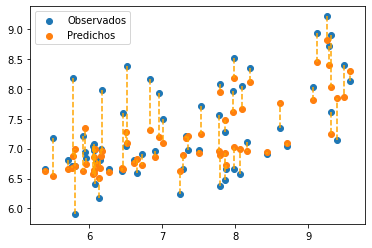

In [28]:
# Completar aquí
from matplotlib.collections import LineCollection

fig, ax = plt.subplots()

ax.scatter(X_test[:,2],y_test, label = 'Observados')
ax.scatter(X_test[:,2],y_test_pred, label = 'Predichos')

ax.plot((X_test[:,2],X_test[:,2]),([i for i in y_test], [i for i in y_test_pred]),color = 'orange', linestyle = '--')


   

plt.legend()

# Opcional. Ajuste incluyendo características polinomiales en la regresión de RandomForest.
Es posible incluir las características que corresponden a potencias y productos de características existentes en el conjunto. Se puede hacer de manera muy sencilla usando el `transformer` `PolynomialFeatures` del submódulo `preprocessing`. 
Añadid un paso en el flujo `procesado_rfr` que consista en el transformer  `PolynomialFeatures`.
Una vez añadido, realizad el `GridSearchCV` incluyendo también el hiperparámetro `degree` de `PolynomialFeatures` que pueda tomar el valor 2 o 3.
Comprobad la bondad del ajuste del mejor modelo sobre el conjunto de test.

In [178]:
# Completar aquí
from sklearn.preprocessing import PolynomialFeatures
procesado_rfr = Pipeline(
    [
        ('imputacion', SimpleImputer(strategy='median')),
        ('transform', PolynomialFeatures()), 
        ('estanderización', StandardScaler()),
        ('rfr', RandomForestRegressor())
    ]
)
# --------------------
procesado_rfr

grid_search = GridSearchCV(
    estimator = procesado_rfr,
    param_grid = {
        'transform__degree': [1, 2, 3],
        'rfr__n_estimators': [3, 10, 30],
        'rfr__max_features': [2, 8, 15]
        
    },
    cv = 5,
    scoring = 'neg_mean_squared_error'
)
# --------------------
grid_search

grid_search.fit(X_train, y_train)

y_test_pred = grid_search.predict(X_test)
RMSE = mean_squared_error(y_test, y_test_pred)

# --------------------
print(f'El valor de RMSE para la mejor combinación de hiperparámetros es: {RMSE}')
# Fin Completar aquí

El valor de RMSE para la mejor combinación de hiperparámetros es: 0.20691098972548336


In [179]:
# Completar aquí: mejor combinación de hiperparámetros
grid_search.best_params_
# --------------------


{'rfr__max_features': 15, 'rfr__n_estimators': 30, 'transform__degree': 3}

In [180]:
# Completar aquí: valores de la puntuación de todos los modelos probados
resultados = grid_search.cv_results_
for mean_score, params in zip(resultados['mean_test_score'], resultados['params']):
    print(np.sqrt(-mean_score), params)

0.44678052814630176 {'rfr__max_features': 2, 'rfr__n_estimators': 3, 'transform__degree': 1}
0.4368526429697059 {'rfr__max_features': 2, 'rfr__n_estimators': 3, 'transform__degree': 2}
0.4612593295687609 {'rfr__max_features': 2, 'rfr__n_estimators': 3, 'transform__degree': 3}
0.39658114319184995 {'rfr__max_features': 2, 'rfr__n_estimators': 10, 'transform__degree': 1}
0.38328516899678494 {'rfr__max_features': 2, 'rfr__n_estimators': 10, 'transform__degree': 2}
0.38774455643214184 {'rfr__max_features': 2, 'rfr__n_estimators': 10, 'transform__degree': 3}
0.36790360945295975 {'rfr__max_features': 2, 'rfr__n_estimators': 30, 'transform__degree': 1}
0.3735399769075784 {'rfr__max_features': 2, 'rfr__n_estimators': 30, 'transform__degree': 2}
0.37709995980464794 {'rfr__max_features': 2, 'rfr__n_estimators': 30, 'transform__degree': 3}
0.46516768085502885 {'rfr__max_features': 8, 'rfr__n_estimators': 3, 'transform__degree': 1}
0.4656073076643187 {'rfr__max_features': 8, 'rfr__n_estimators': 3,